
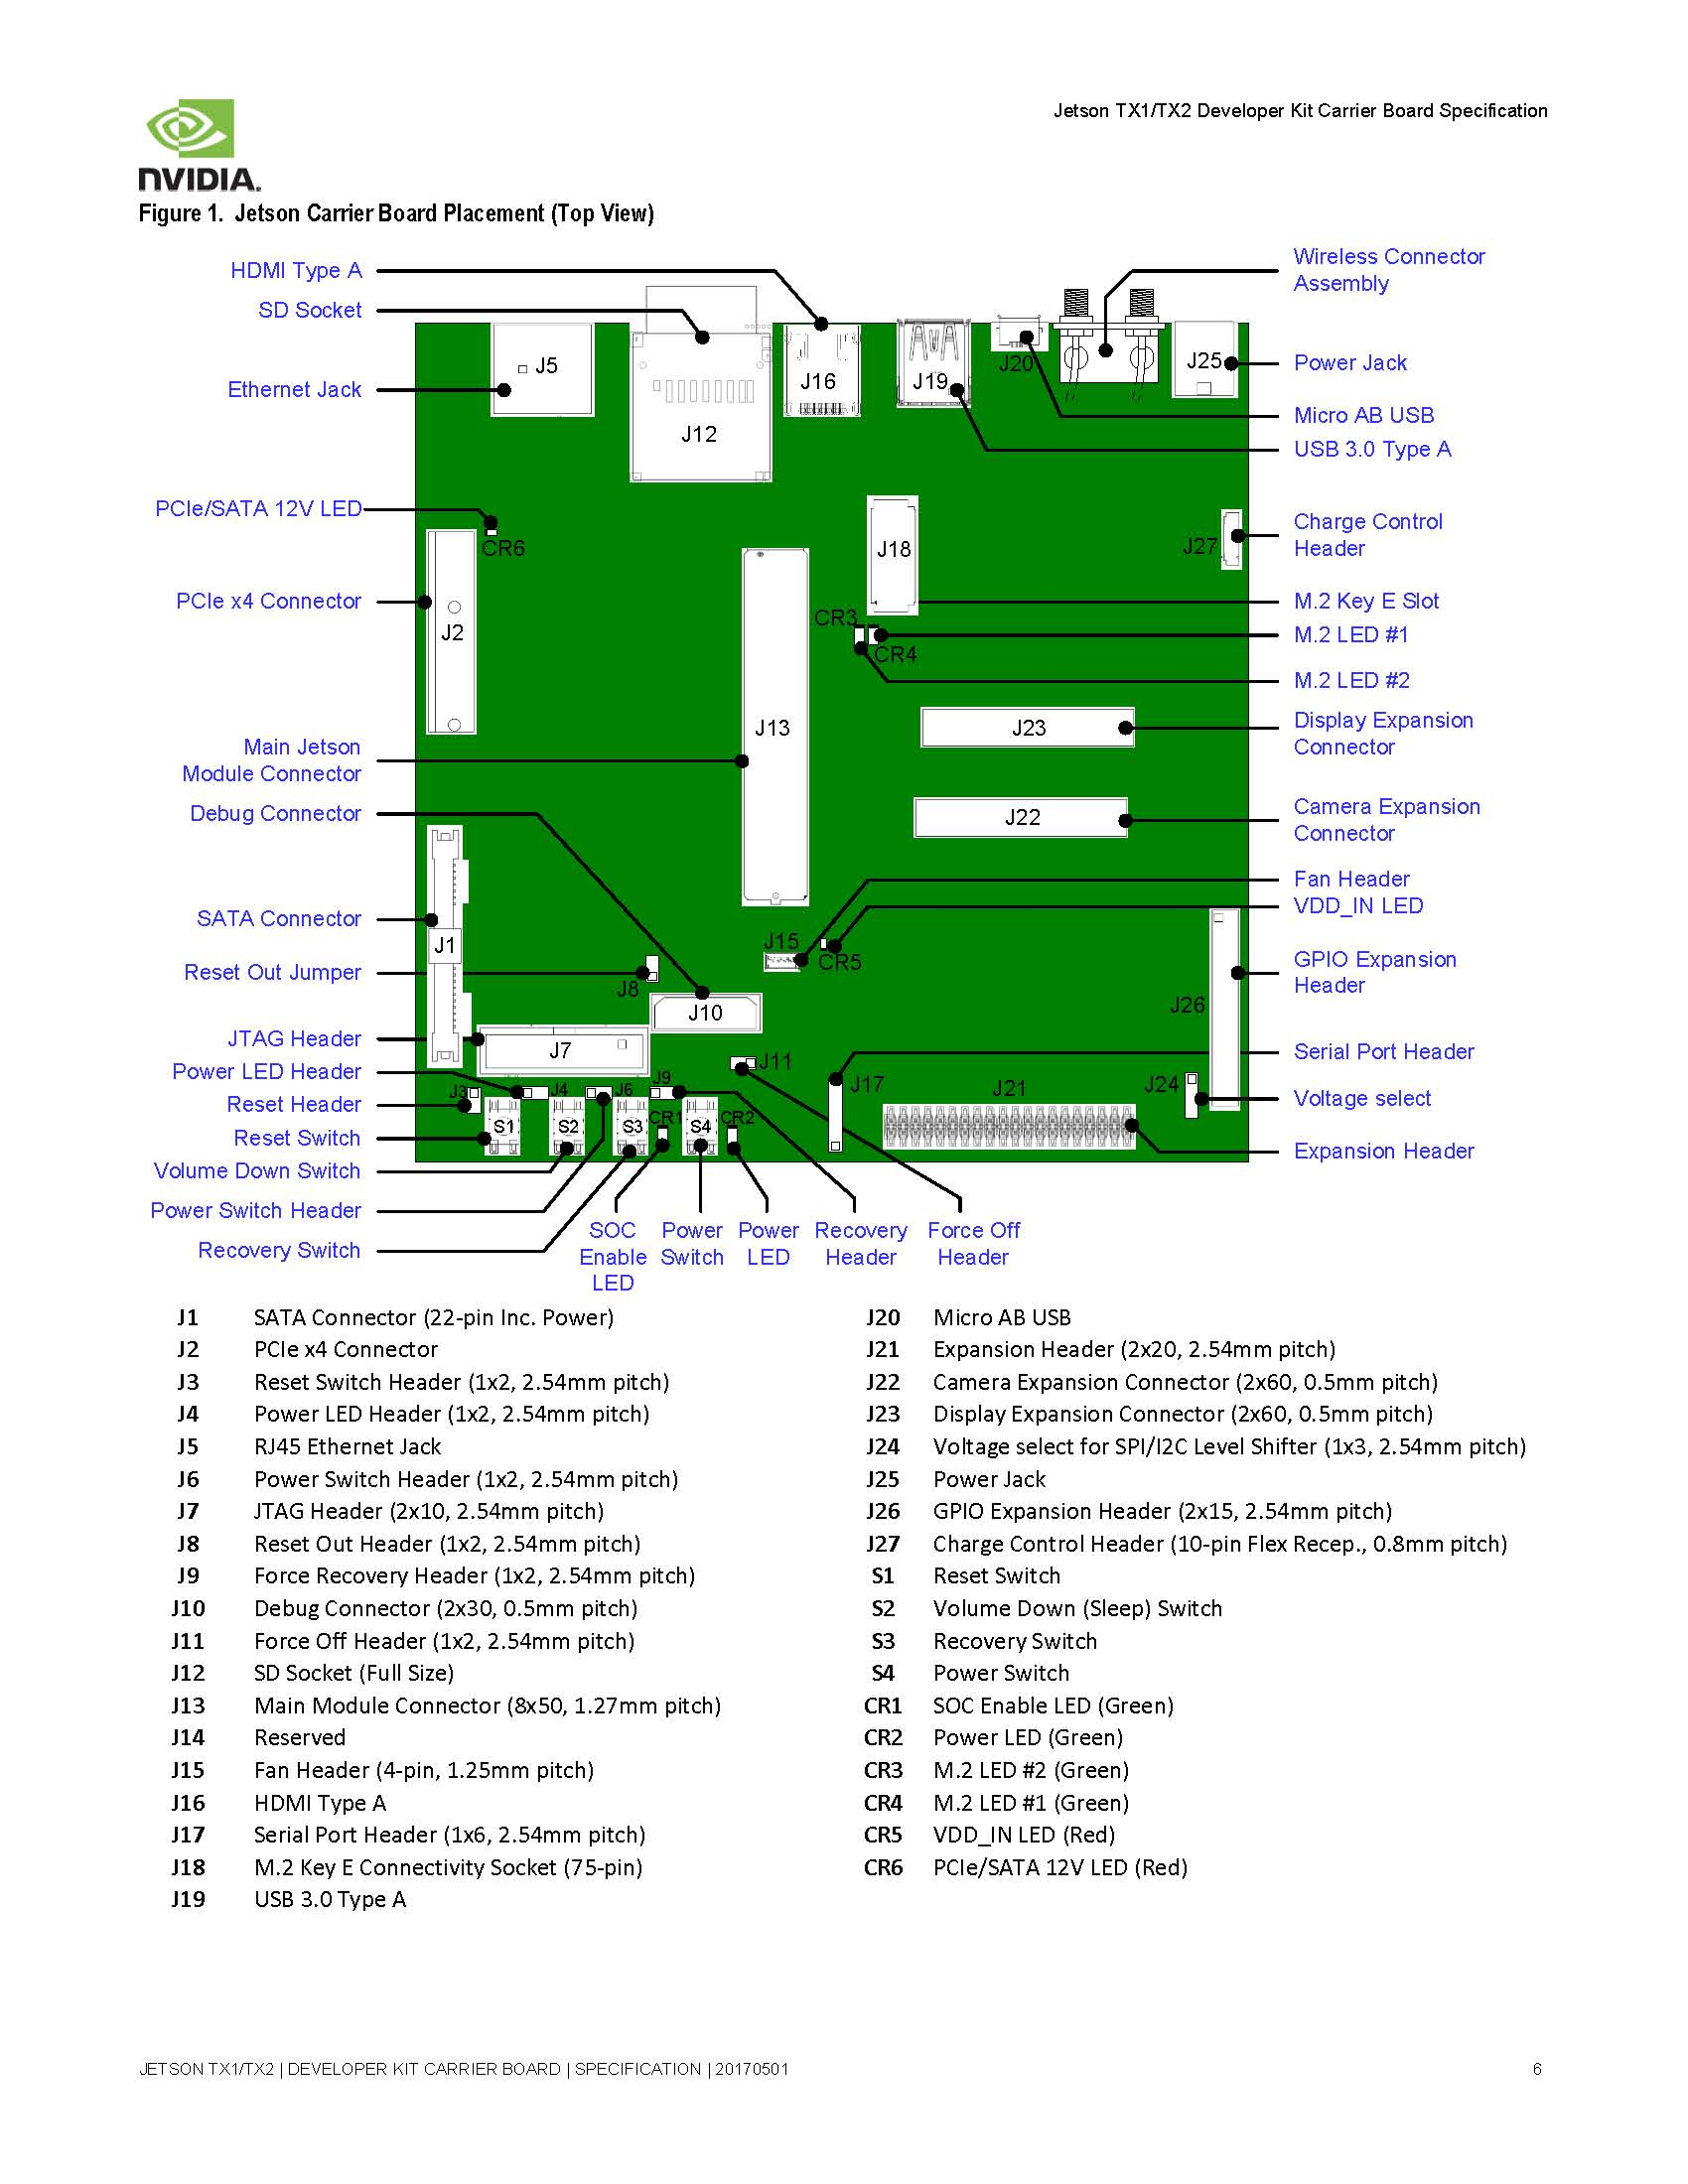


S2-Volume Down Switch=User definable button


S3-Force Recovery


J21-40 pin GPIO Header


J26-30 pin GPIO Expansion Header-it includes CAN


J18-mini PCIe expansion slot for additional communication option



We will need ubuntu linux system as a host. Connect mouse, keyboard,wifi antenna etc-->power button(S4)-->if nothing happens, press reset(S1)-->follow instuctions in the monitor. Change directories and run the installer script-->reboot-->linux ubuntu graphical window comes up-->Load software on the host to flash memory on Jetson with the latest developement environment.Later we can connect with the host using ethernet or wifi.